# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
df = pd.read_csv('all_data.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18682 entries, 0 to 18681
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        18682 non-null  int64  
 1   uri               18682 non-null  object 
 2   song              18682 non-null  object 
 3   artist            18682 non-null  object 
 4   danceability      18682 non-null  float64
 5   energy            18682 non-null  float64
 6   loudness          18682 non-null  float64
 7   speechiness       18682 non-null  float64
 8   acousticness      18682 non-null  float64
 9   instrumentalness  18682 non-null  float64
 10  liveness          18682 non-null  float64
 11  valence           18682 non-null  float64
 12  tempo             18682 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
df.head()

,Unnamed: 0,uri,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,spotify:track:7xOh2WlB3L3J2fh2rtVFY0,Johanna,Geoff Zanelli,0.627,0.768,-6.449,0.0282,0.0406,0.0107,0.0843,0.906,113.048
1,1,spotify:track:6rztuzIBEueoBWNYyhmKa4,Hong Kong,Geoff Zanelli,0.448,0.507,-10.181,0.0361,0.1060,0.7300,0.1550,0.223,113.323
2,2,spotify:track:1XSeMdMvsZbkdRatUMd2sp,The Farmer's Daughter,Geoff Zanelli,0.360,0.478,-9.121,0.0342,0.0163,0.8550,0.3410,0.305,96.536
3,3,spotify:track:63CpQ7ltku7C1YyBxXgo8A,The Painted Lady May Be in Play,Geoff Zanelli,0.446,0.780,-9.255,0.0481,0.0463,0.9450,0.1120,0.328,101.076
4,4,spotify:track:0AY4PnjCPP4ZeDWX9AST7y,Spinoza,Geoff Zanelli,0.510,0.572,-10.967,0.0539,0.0686,0.8740,0.1300,0.153,113.413


In [5]:
df.describe()

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,18682.0000,18682.000000,18682.000000,18682.000000,18682.000000,18682.000000,18682.000000,18682.000000,18682.000000,18682.000000
mean,9340.5000,0.564309,0.602154,-8.119377,0.089899,0.330445,0.047369,0.253163,0.491013,119.962120
std,5393.1732,0.162596,0.238658,4.104788,0.132025,0.326481,0.171040,0.240961,0.240809,29.487376
min,0.0000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4670.2500,0.459000,0.429000,-9.970000,0.034200,0.036325,0.000000,0.101000,0.299000,97.463750
50%,9340.5000,0.580000,0.637000,-7.045000,0.045800,0.198000,0.000004,0.143000,0.479000,119.994500
75%,14010.7500,0.684000,0.799000,-5.257000,0.079700,0.621000,0.000656,0.314000,0.679000,137.960750
max,18681.0000,0.984000,0.998000,-0.589000,0.962000,0.996000,0.999000,0.999000,0.988000,220.063000


In [6]:
df = df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18682 entries, 0 to 18681
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               18682 non-null  object 
 1   song              18682 non-null  object 
 2   artist            18682 non-null  object 
 3   danceability      18682 non-null  float64
 4   energy            18682 non-null  float64
 5   loudness          18682 non-null  float64
 6   speechiness       18682 non-null  float64
 7   acousticness      18682 non-null  float64
 8   instrumentalness  18682 non-null  float64
 9   liveness          18682 non-null  float64
 10  valence           18682 non-null  float64
 11  tempo             18682 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.7+ MB


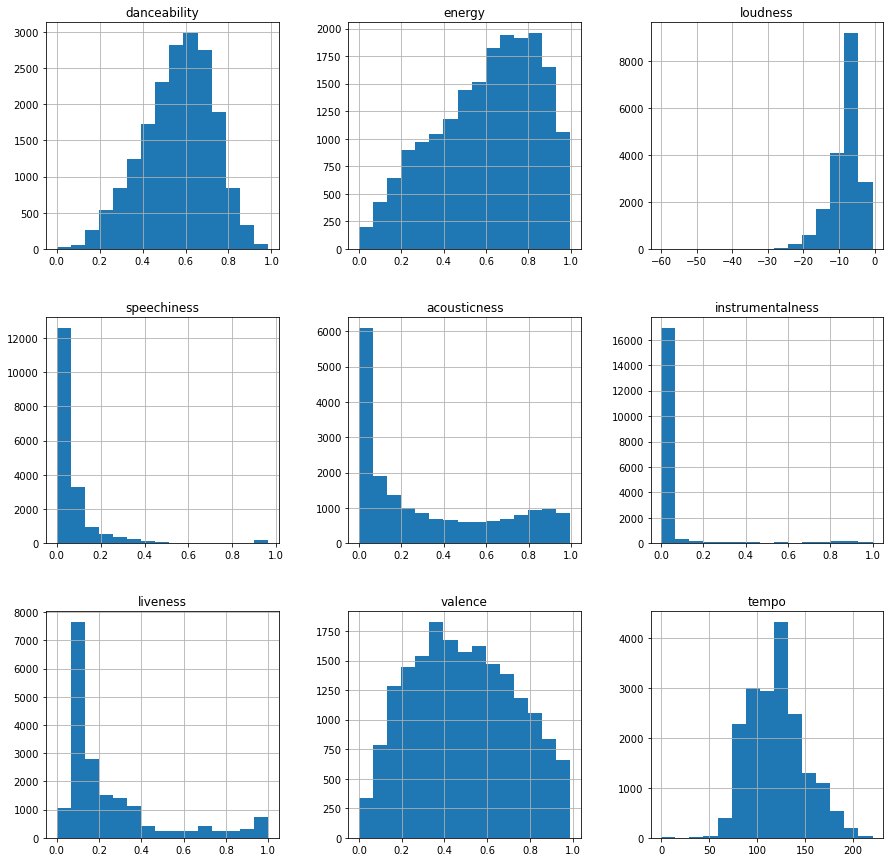

In [8]:
df.hist(bins=15, figsize=(15,15));

# Reshaping the data

In [11]:
df.index=df.iloc[:,1]
# index location function [:,_] 

In [12]:
df.head(1)

,uri,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song,,,,,,,,,,,,
Johanna,spotify:track:7xOh2WlB3L3J2fh2rtVFY0,Johanna,Geoff Zanelli,0.627,0.768,-6.449,0.0282,0.0406,0.0107,0.0843,0.906,113.048


In [15]:
# keep columns 1-10
df = df.drop(['song'],axis=1)

In [16]:
df.head()

,uri,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song,,,,,,,,,,,
Johanna,spotify:track:7xOh2WlB3L3J2fh2rtVFY0,Geoff Zanelli,0.627,0.768,-6.449,0.0282,0.0406,0.0107,0.0843,0.906,113.048
Hong Kong,spotify:track:6rztuzIBEueoBWNYyhmKa4,Geoff Zanelli,0.448,0.507,-10.181,0.0361,0.1060,0.7300,0.1550,0.223,113.323
The Farmer's Daughter,spotify:track:1XSeMdMvsZbkdRatUMd2sp,Geoff Zanelli,0.360,0.478,-9.121,0.0342,0.0163,0.8550,0.3410,0.305,96.536
The Painted Lady May Be in Play,spotify:track:63CpQ7ltku7C1YyBxXgo8A,Geoff Zanelli,0.446,0.780,-9.255,0.0481,0.0463,0.9450,0.1120,0.328,101.076
Spinoza,spotify:track:0AY4PnjCPP4ZeDWX9AST7y,Geoff Zanelli,0.510,0.572,-10.967,0.0539,0.0686,0.8740,0.1300,0.153,113.413


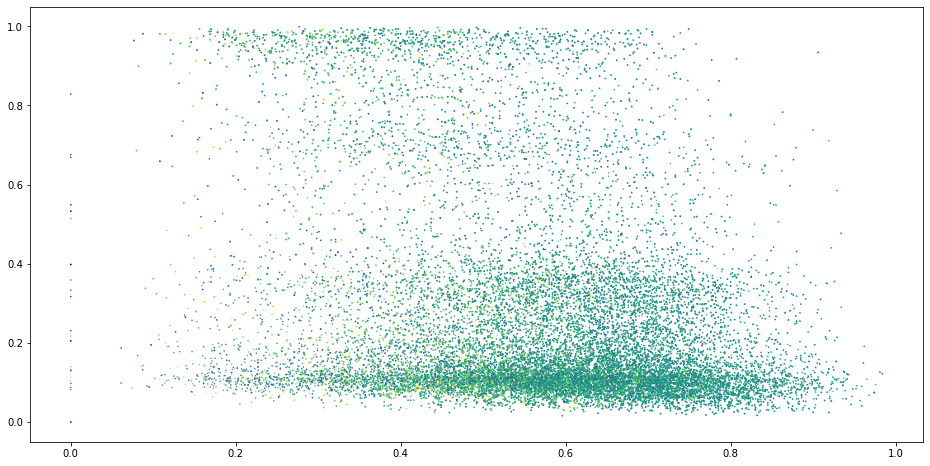

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(df.iloc[:,2],df.iloc[:,8],df.iloc[:,3],df.iloc[:,10]);

In [18]:
# because I want to keep artist name and uri, I will create another dataframe for clustering, and then merge them.
cluster_df = df.drop(['uri','artist'],axis=1)

In [19]:
cluster_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song,,,,,,,,,
Johanna,0.627,0.768,-6.449,0.0282,0.04060,0.010700,0.0843,0.906,113.048
Hong Kong,0.448,0.507,-10.181,0.0361,0.10600,0.730000,0.1550,0.223,113.323
The Farmer's Daughter,0.360,0.478,-9.121,0.0342,0.01630,0.855000,0.3410,0.305,96.536
The Painted Lady May Be in Play,0.446,0.780,-9.255,0.0481,0.04630,0.945000,0.1120,0.328,101.076
Spinoza,0.510,0.572,-10.967,0.0539,0.06860,0.874000,0.1300,0.153,113.413
...,...,...,...,...,...,...,...,...,...
"Houston, We Got a Problem",0.521,0.762,-5.059,0.0362,0.09610,0.000006,0.3950,0.486,143.866
Must've Never Met You,0.455,0.892,-3.218,0.0564,0.00951,0.000000,0.1430,0.641,75.218
Beautiful Crazy,0.551,0.402,-7.431,0.0262,0.67600,0.000000,0.0928,0.382,103.313


# Clustering

In [20]:
kmeans = KMeans(n_clusters = 10)

In [21]:
cluster = kmeans.fit(cluster_df)

In [22]:
cluster.cluster_centers_

array([[ 6.12867231e-01,  6.78018266e-01, -7.11730296e+00,
         7.50548650e-02,  2.35951166e-01,  5.98963597e-02,
         2.58657891e-01,  5.11304328e-01,  1.28297913e+02],
       [ 4.82596631e-01,  4.44888239e-01, -1.02343453e+01,
         1.13302745e-01,  5.32930001e-01,  4.77791852e-02,
         2.40950042e-01,  4.00695300e-01,  7.76462824e+01],
       [ 4.69030570e-01,  6.30437454e-01, -7.75373501e+00,
         1.16627683e-01,  3.07250492e-01,  4.39964756e-02,
         2.62245152e-01,  5.09405107e-01,  1.72214170e+02],
       [ 6.08067487e-01,  5.88328328e-01, -8.28959380e+00,
         7.82146859e-02,  3.58710126e-01,  4.09383169e-02,
         2.49046817e-01,  5.04608871e-01,  1.06656698e+02],
       [ 5.23219985e-01,  6.89868617e-01, -6.89000456e+00,
         9.69949088e-02,  2.27296149e-01,  3.90690547e-02,
         2.69859954e-01,  5.11119681e-01,  1.54338284e+02],
       [ 4.42027586e-01,  6.31174483e-01, -7.79872644e+00,
         1.37132414e-01,  3.02544211e-01,  3.621350

In [23]:
cluster.labels_

array([9, 9, 6, ..., 3, 4, 4], dtype=int32)

In [24]:
cluster_df['cluster'] = cluster.labels_

In [25]:
cluster_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song,,,,,,,,,,
Johanna,0.627,0.768,-6.449,0.0282,0.0406,0.0107,0.0843,0.906,113.048,9
Hong Kong,0.448,0.507,-10.181,0.0361,0.1060,0.7300,0.1550,0.223,113.323,9
The Farmer's Daughter,0.360,0.478,-9.121,0.0342,0.0163,0.8550,0.3410,0.305,96.536,6
The Painted Lady May Be in Play,0.446,0.780,-9.255,0.0481,0.0463,0.9450,0.1120,0.328,101.076,3
Spinoza,0.510,0.572,-10.967,0.0539,0.0686,0.8740,0.1300,0.153,113.413,9


In [26]:
cluster_df['cluster'].value_counts()

0    3073
6    2927
9    2637
1    2404
3    2356
8    2147
2    1351
4    1316
5     435
7      36
Name: cluster, dtype: int64

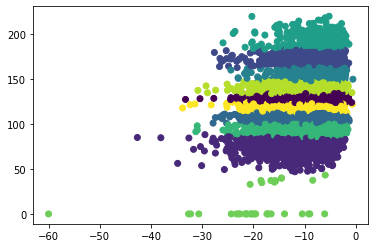

In [27]:
# clustered by tempo, it seems scaling is necessary

plt.scatter(cluster_df.iloc[:,2],cluster_df.iloc[:,8],c=cluster_df.iloc[:,9]);

## Scaling the data, then clustering

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# scaled numeric columns

cluster_scaled = StandardScaler().fit_transform(cluster_df.drop(['cluster'],axis=1))

In [30]:
# scaled dataframe

cluster_scaled_df = pd.DataFrame(cluster_scaled, columns =['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness',
                                                           'valence','tempo'] )

In [31]:
cluster_scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.385572,0.694929,0.406945,-0.467341,-0.887809,-0.214392,-0.700805,1.723345,-0.234484
1,-0.715342,-0.398715,-0.502262,-0.407502,-0.687486,3.991166,-0.407390,-1.112999,-0.225157
2,-1.256574,-0.520231,-0.244020,-0.421894,-0.962241,4.722009,0.364539,-0.772471,-0.794467
3,-0.727643,0.745212,-0.276666,-0.316608,-0.870349,5.248215,-0.585846,-0.676958,-0.640499
4,-0.334020,-0.126351,-0.693751,-0.272675,-0.802043,4.833097,-0.511143,-1.403693,-0.222105


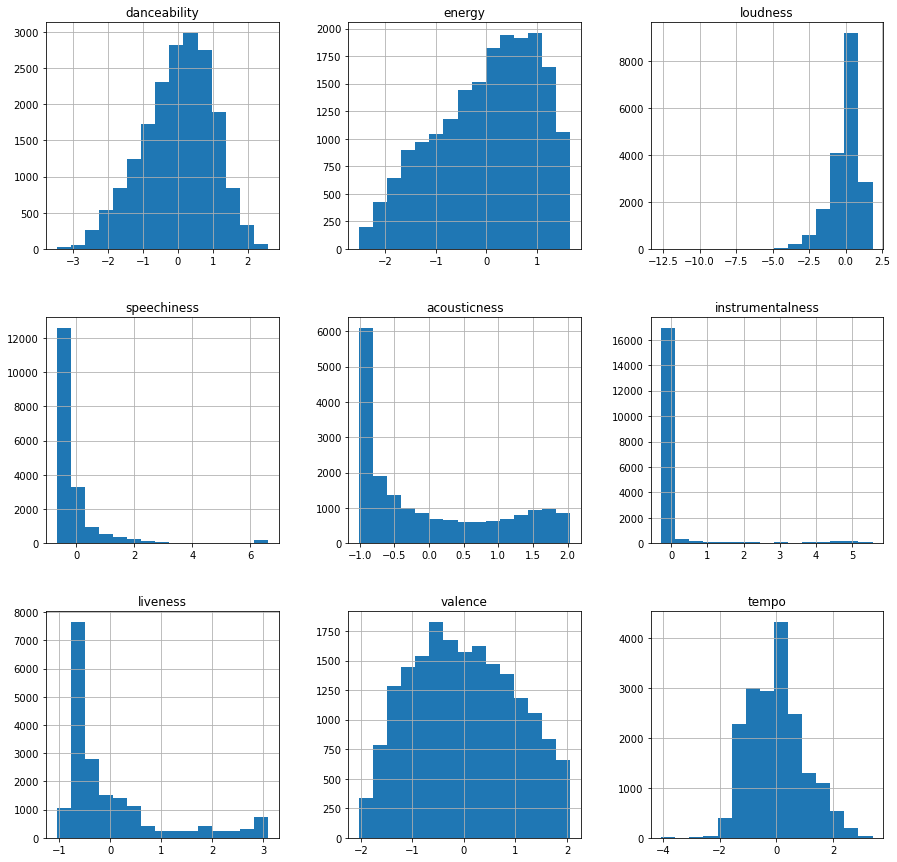

In [32]:
cluster_scaled_df.hist(bins=15, figsize=(15,15));

In [33]:
cluster_scaled_kmean = kmeans.fit(cluster_scaled_df)

In [34]:
cluster_scaled_df['cluster'] = cluster_scaled_kmean.labels_

In [35]:
cluster_scaled_df['cluster'].value_counts()

6    3330
8    3253
0    2293
2    2292
7    2220
4    2179
5    1835
9     568
1     403
3     309
Name: cluster, dtype: int64

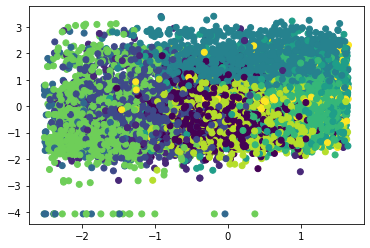

In [36]:
plt.scatter(cluster_scaled_df.iloc[:,1],cluster_scaled_df.iloc[:,8],c=cluster_scaled_df.iloc[:,9]);

# Optimal K - Elbow Method

In [37]:
kmeans=KMeans(n_clusters=500)
kmeans.fit(cluster_scaled_df)
print(kmeans.inertia_)

17548.393643526364


In [64]:
K = range(300,600,30)

In [65]:
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(cluster_scaled_df)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'elbow method, optimal k by inertia')

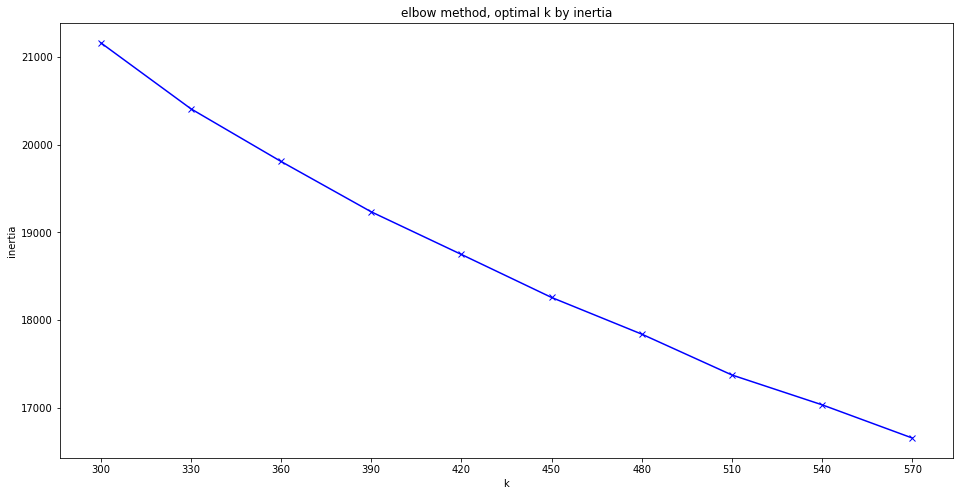

In [67]:
# plot the results
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,30.0))
plt.title('elbow method, optimal k by inertia')

Not obvious elbow but I will take k = 510 as I have 18k songs, in each cluster 30 songs. Let's see find out. 

In [68]:
kmean=KMeans(n_clusters=510)

In [69]:
cluster_last = kmean.fit(cluster_scaled_df)

In [70]:
cluster_scaled_last = cluster_scaled_df.drop(['cluster'],axis=1)

In [71]:
cluster_scaled_last['cluster'] = cluster_last.labels_

In [72]:
cluster_scaled_last['cluster'].value_counts()

2      125
288    125
383    116
139    113
167    101
      ... 
446      2
73       1
396      1
401      1
171      1
Name: cluster, Length: 510, dtype: int64

- some clusters are really small, one of them contains just 1, but I leave like this.


In [73]:
cluster_scaled_last.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.385572,0.694929,0.406945,-0.467341,-0.887809,-0.214392,-0.700805,1.723345,-0.234484,306
1,-0.715342,-0.398715,-0.502262,-0.407502,-0.687486,3.991166,-0.407390,-1.112999,-0.225157,81
2,-1.256574,-0.520231,-0.244020,-0.421894,-0.962241,4.722009,0.364539,-0.772471,-0.794467,81
3,-0.727643,0.745212,-0.276666,-0.316608,-0.870349,5.248215,-0.585846,-0.676958,-0.640499,51
4,-0.334020,-0.126351,-0.693751,-0.272675,-0.802043,4.833097,-0.511143,-1.403693,-0.222105,81


I will just export data frame containing uri,song title, artist and cluster column.

In [75]:
cluster_scaled_last.index = cluster_df.index

In [76]:
cluster_scaled_last

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song,,,,,,,,,,
Johanna,0.385572,0.694929,0.406945,-0.467341,-0.887809,-0.214392,-0.700805,1.723345,-0.234484,306
Hong Kong,-0.715342,-0.398715,-0.502262,-0.407502,-0.687486,3.991166,-0.407390,-1.112999,-0.225157,81
The Farmer's Daughter,-1.256574,-0.520231,-0.244020,-0.421894,-0.962241,4.722009,0.364539,-0.772471,-0.794467,81
The Painted Lady May Be in Play,-0.727643,0.745212,-0.276666,-0.316608,-0.870349,5.248215,-0.585846,-0.676958,-0.640499,51
Spinoza,-0.334020,-0.126351,-0.693751,-0.272675,-0.802043,4.833097,-0.511143,-1.403693,-0.222105,81
...,...,...,...,...,...,...,...,...,...,...
"Houston, We Got a Problem",-0.266366,0.669788,0.745583,-0.406745,-0.717810,-0.276916,0.588647,-0.020819,0.810670,140
Must've Never Met You,-0.672290,1.214515,1.194095,-0.253739,-0.983039,-0.276952,-0.457191,0.622860,-1.517440,159
Beautiful Crazy,-0.081855,-0.838687,0.167705,-0.482490,1.058452,-0.276952,-0.665529,-0.452708,-0.564634,452


In [77]:
spotify_data = pd.concat([df.iloc[:, 0:2], cluster_scaled_last['cluster']], axis = 1)

In [78]:
spotify_data

,uri,artist,cluster
song,,,
Johanna,spotify:track:7xOh2WlB3L3J2fh2rtVFY0,Geoff Zanelli,306
Hong Kong,spotify:track:6rztuzIBEueoBWNYyhmKa4,Geoff Zanelli,81
The Farmer's Daughter,spotify:track:1XSeMdMvsZbkdRatUMd2sp,Geoff Zanelli,81
The Painted Lady May Be in Play,spotify:track:63CpQ7ltku7C1YyBxXgo8A,Geoff Zanelli,51
Spinoza,spotify:track:0AY4PnjCPP4ZeDWX9AST7y,Geoff Zanelli,81
...,...,...,...
"Houston, We Got a Problem",spotify:track:6guWjUuNYziyNXgjFo1IpF,Luke Combs,140
Must've Never Met You,spotify:track:6ojicjDYUUoeE1tdSvfFo4,Luke Combs,159
Beautiful Crazy,spotify:track:2rxQMGVafnNaRaXlRMWPde,Luke Combs,452


In [79]:
spotify_data.to_csv('spottify_data')